#### K Means Clustering for Starbucks.csv and Dunkin.csv


===== Running k-Means for Dunkin =====


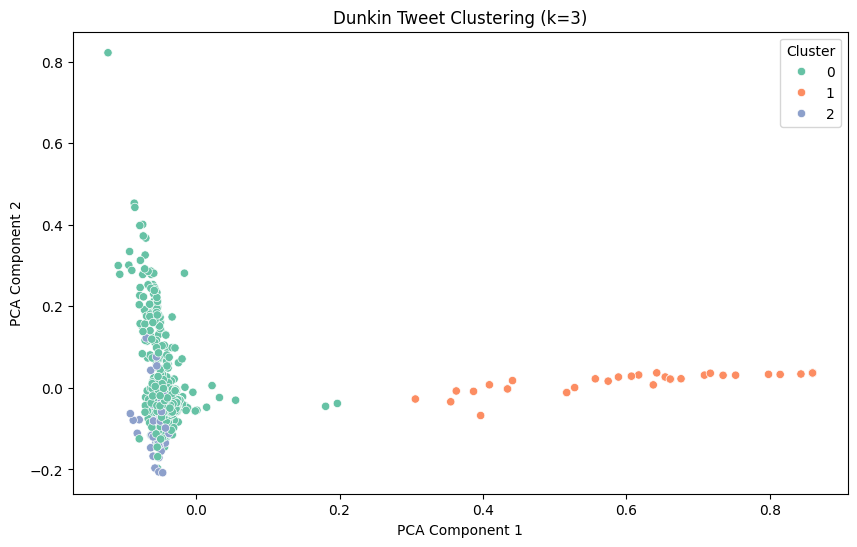


Dunkin Cluster 0 Sample Tweets:
Ion expect you to feel where I’m coming from if...
         this latte from dunkin this morning 10/10
Tried to grab almond milk at the Boston Trader ...
i was about ready to tussle with this bitch at ...
Hi yes I’ll have a strawberry refresher with gr...

Dunkin Cluster 1 Sample Tweets:
HODLers dunkin' on paper hands while $BTC moons...
HODLers dunkin' on fiat clowns while #BTC moons...
HODLers dunkin' on shitcoins while BTC moons 🚀 ...
HODLers vibin' while #BTC moons 🚀 Screw the FUD...
HODLers dunkin' on paper hands while $BTC moons...

Dunkin Cluster 2 Sample Tweets:
   what if Dunk in Dunkin Donut??? its rhyming omg
                      On the clock got my Dunkin 🤗
HEY I KNOW NO ONE CARES BUT DUNKIN DONUTS FINAL...
I may look fine but deep down I just want Dunki...
some nigga eating ice cream at 9:37am in this d...

Top words in Dunkin Cluster 0:
dunkin: 409
donuts: 115
dunkin’: 69
coffee: 60
like: 39
i’m: 34
im: 33
get: 28
starbucks: 27
morning: 22

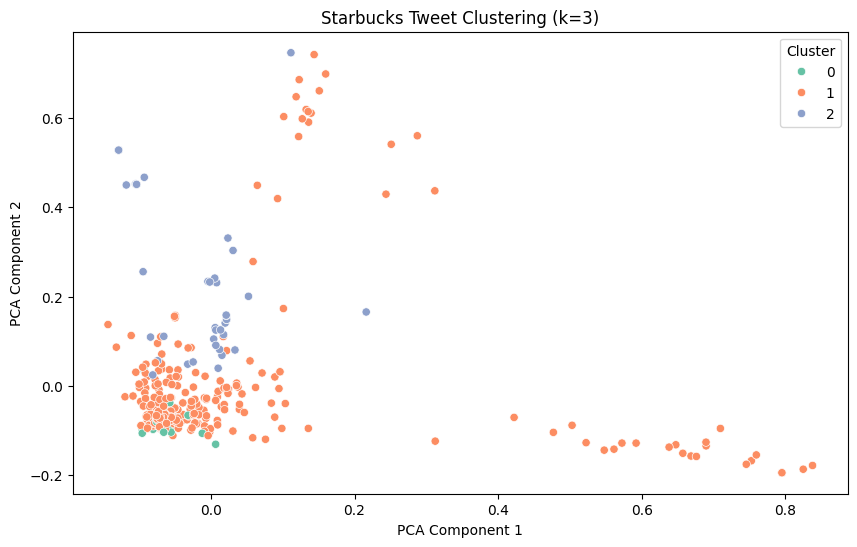


Starbucks Cluster 0 Sample Tweets:
Teacher appreciation week .. yall better be goo...
                                  I want Starbucks
Every time I see someone walking around w Starb...
I want some chicken patties and Starbucks açaí ...
Customers at Starbucks really are just allergic...

Starbucks Cluster 1 Sample Tweets:
the Starbucks I come to every Sunday is soooooo...
I need a good Starbucks order\n\nSomeone give m...
Yesterday, I had a chocolate muffin from Starbu...
            Dutchbros better den Starbucks ! IDC !
Decided to try that new coffee shop downtown, w...

Starbucks Cluster 2 Sample Tweets:
omg i just tried the new breakfast sandwich at ...
omg my coffee is still hot can i get a refill a...
omg i just got my hands on the new menu at star...
omg i just got my favourite coffee order wrong ...
omg i just tried the new matcha latte at starbu...

Top words in Starbucks Cluster 0:
want: 16
starbucks: 12
drink: 3
go: 3
good: 2
flowers: 2
time: 2
dont: 2
10: 2
sab: 2

Top w

In [6]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
def run_kmeans_clustering(df, brand_name, k=3):
    print(f"\n===== Running k-Means for {brand_name} =====")

    # Preprocessing
    stop_words = set(stopwords.words('english'))
    def preprocess(text):
        text = text.lower()
        text = re.sub(r"http\S+|www\S+|https\S+", '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = text.split()
        tokens = [word for word in tokens if word not in stop_words]
        return ' '.join(tokens)

    df['clean_text'] = df['text'].apply(preprocess)

    # Vectorize
    vectorizer = TfidfVectorizer(max_df=0.8, min_df=2)
    X = vectorizer.fit_transform(df['clean_text'])

    # k-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['cluster'] = kmeans.fit_predict(X)

    # PCA for plotting
    pca = PCA(n_components=2, random_state=42)
    components = pca.fit_transform(X.toarray())
    df['pca_x'] = components[:, 0]
    df['pca_y'] = components[:, 1]

    # Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='pca_x', y='pca_y', hue='cluster', palette='Set2')
    plt.title(f"{brand_name} Tweet Clustering (k={k})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title='Cluster')
    plt.show()

    # Print sample tweets
    for cluster_id in sorted(df['cluster'].unique()):
        print(f"\n{brand_name} Cluster {cluster_id} Sample Tweets:")
        print(df[df['cluster'] == cluster_id]['text'].sample(5, random_state=1).to_string(index=False))

    # Top words
    from collections import Counter
    for cluster_id in sorted(df['cluster'].unique()):
        cluster_texts = df[df['cluster'] == cluster_id]['clean_text'].tolist()
        all_words = ' '.join(cluster_texts).split()
        word_freq = Counter(all_words).most_common(10)
        print(f"\nTop words in {brand_name} Cluster {cluster_id}:")
        for word, freq in word_freq:
            print(f"{word}: {freq}")

# Load each dataset
df_dunkin = pd.read_csv('dunkin.csv')[['text']].dropna()
df_starbucks = pd.read_csv('starbucks.csv')[['text']].dropna()

# Run for each brand separately
run_kmeans_clustering(df_dunkin, "Dunkin", k=3)
run_kmeans_clustering(df_starbucks, "Starbucks", k=3)
